In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\win10\Documents\supermarket sales.csv")

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
len(data)

1000

In [5]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

1. Costumer highest money spent by city

In [12]:
city=data.groupby('City')['Total'].count().sort_values(ascending=False)
city

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: Total, dtype: int64

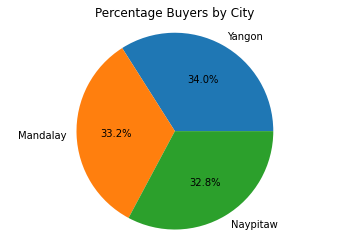

In [16]:
cb = [city[0],city[1],city[2]]

my_labels = 'Yangon','Mandalay','Naypitaw'
plt.pie(cb,labels=my_labels,autopct='%1.1f%%')
plt.title('b')
plt.axis('equal')
plt.show()

2.How many total order per month

In [17]:
data['Month'] = pd.to_datetime(data['Date']).dt.month
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


range(1, 4)


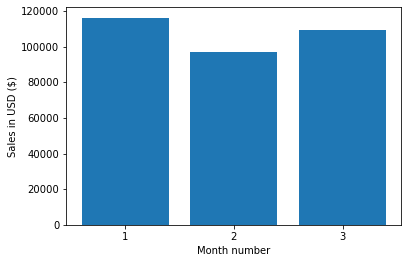

In [21]:
months = range(1,4)
print(months)

plt.bar(months,data.groupby(['Month']).sum()['Total'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


3.Highest money spent

In [44]:
money_spent = data.groupby(by=['Invoice ID','City'], as_index=False)['Total'].sum()
money_spent.head(2)

,Invoice ID,City,Total
0,101-17-6199,Yangon,336.5565
1,101-81-4070,Naypyitaw,131.9220


In [49]:
print('The 10 top customers with highest money spent...')
money_spent.sort_values(by='Total', ascending=False).head(10)

The 10 top customers with highest money spent...


,Invoice ID,City,Total
949,860-79-0874,Naypyitaw,1042.650
721,687-47-8271,Yangon,1039.290
223,283-26-5248,Naypyitaw,1034.460
816,751-41-9720,Naypyitaw,1023.750
250,303-96-2227,Mandalay,1022.490
800,744-16-7898,Mandalay,1022.385
205,271-88-8734,Naypyitaw,1020.705
156,234-65-2137,Naypyitaw,1003.590
549,554-42-2417,Naypyitaw,1002.120
281,325-77-6186,Yangon,951.825


4.Payment

In [93]:
pay=data[['Payment','Gender']].value_counts()
pay

Payment      Gender
Ewallet      Male      185
Cash         Female    178
             Male      166
Credit card  Female    163
Ewallet      Female    160
Credit card  Male      148
dtype: int64

5.Product sold the most

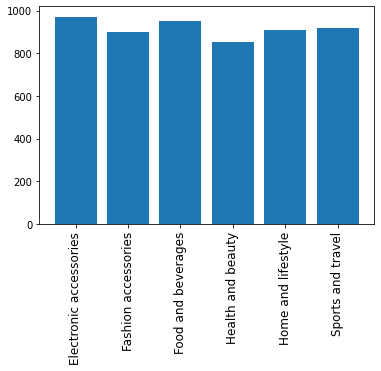

In [20]:
product_group = data.groupby('Product line')
quantity_ordered = product_group.sum()['Quantity']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=12)
plt.show()

In [21]:
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Grouped
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,Health and beauty
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,Electronic accessories


<ipython-input-23-d741d67dd206>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=12)
<ipython-input-23-d741d67dd206>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


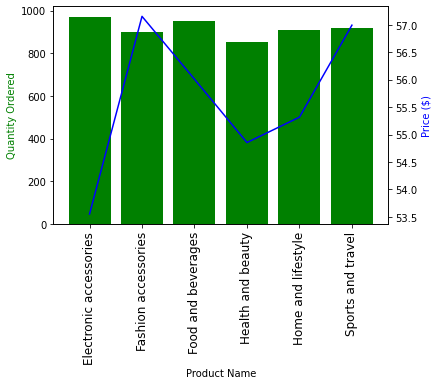

In [23]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = data.groupby('Product line').mean()['Unit price']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=12)

fig.show()